<a href="https://colab.research.google.com/github/Medeeenah/Predicting-Customers-Churn-Using-Logistic-Regression-/blob/main/Bank_customers_churn_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predicting Bank Customers Churn with Logistic regression

###Import Dependencies

In [5]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from  IPython.display import display

%matplotlib inline

###Prepare Data
####Import Data


In [7]:
df = pd.read_csv("/content/drive/MyDrive/churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


###Exploratory Data Analysis(EDA)

In [9]:
#Number of rows and columns
df.shape

(10000, 14)

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
# Convert column headings to lower case
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [13]:
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [14]:
#Count the number of unique rows
df.nunique()

rownumber          10000
customerid         10000
surname             2932
creditscore          460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
numofproducts          4
hascrcard              2
isactivemember         2
estimatedsalary     9999
exited                 2
dtype: int64

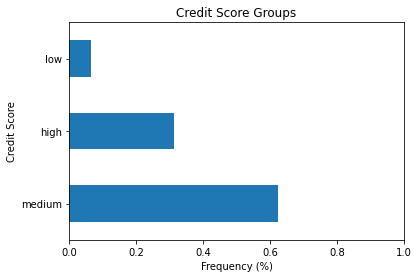

In [15]:
# Create a dictionary to group the credit scores into "low", "medium", and "high"
credit_dict = {
    range(350, 501): "low",
    range(501, 701): "medium",
    range(701, 851): "high",
}
#Create a new column called "credit_score" for the grouped credit scores
df["credit_score"] = df["creditscore"].replace(credit_dict)

# Create bar chart of credit_value_counts
credit_value_counts = df["credit_score"].value_counts(normalize=True)
credit_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Credit Score")
plt.title("Credit Score Groups");

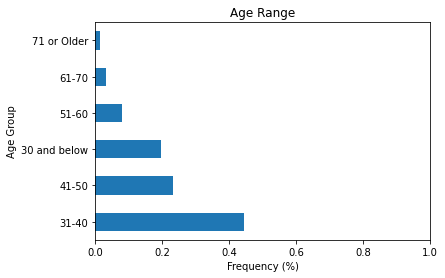

In [16]:
# Create a dictionary to group the ages into different categories
age_dict = {
    range(18, 31): "30 and below",
    range(31, 41): "31-40",
    range(41, 51): "41-50",
    range(51, 61): "51-60",
    range(61, 71): "61-70",
    range(71, 95): "71 or Older",
}
#Create a new column called "age_group" for the grouped ages
df["age_group"] = df["age"].replace(age_dict)

# Create bar chart of age_value_counts
age_value_counts = df["age_group"].value_counts(normalize=True)
age_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Age Group")
plt.title("Age Range");

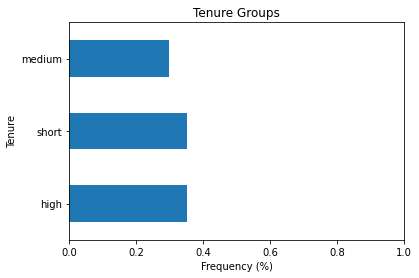

In [17]:
# Create a dictionary to place "tenure" into different categories
tenure_dict = {
    range(0, 4): "short",
    range(4, 7): "medium",
    range(7, 11): "high",
}
#Replace "tenure" with the new categories
df["tenure"] = df["tenure"].replace(tenure_dict)

# Create bar chart of tenure_value_counts
tenure_value_counts = df["tenure"].value_counts(normalize=True)
tenure_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Tenure")
plt.title("Tenure Groups");

In [18]:
#Convert "balance" from float to int
df["balance"] = df["balance"].apply(np.int64)

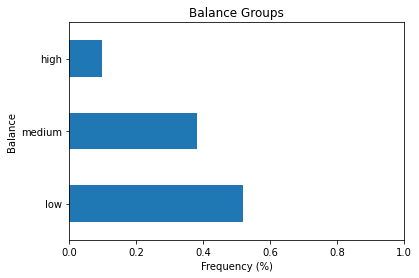

In [19]:
# Create a dictionary to place "balance" into different categories
balance_dict = {
    range(0, 100001): "low",
    range(100001, 150001): "medium",
    range(150001, 260000): "high",
}
#Replace "balance" with the new categories
df["balance"] = df["balance"].replace(balance_dict)

# Create bar chart of credit_value_counts
balance_value_counts = df["balance"].value_counts(normalize=True)
balance_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Balance")
plt.title("Balance Groups");

In [20]:
#Convert "estimatedsalary" from float to int
df["estimatedsalary"] = df["estimatedsalary"].apply(np.int64)

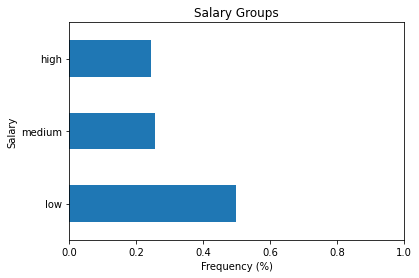

In [21]:
# Create a dictionary to place "estimatedsalary" into different categories
salary_dict = {
    range(0, 100001): "low",
    range(100001, 150001): "medium",
    range(150001, 200000): "high",
}
#Create a new column called "salary" for the grouped "estimatedsalary"
df["salary"] = df["estimatedsalary"].replace(salary_dict)

# Create bar chart of credit_value_counts
salary_value_counts = df["salary"].value_counts(normalize=True)
salary_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Salary")
plt.title("Salary Groups");

In [23]:
#Drop unwanted columns
df = df.drop(columns=["rownumber", "customerid", "surname", "creditscore", "age", "estimatedsalary"])

In [24]:
numerical = ['numofproducts'] 

In [25]:
categorical = ['geography','gender', 'hascrcard','isactivemember', 'credit_score', 'balance', 'age_group', 'tenure', 'salary']

In [26]:
#number of unique values
df[categorical].nunique()

geography         3
gender            2
hascrcard         2
isactivemember    2
credit_score      3
balance           3
age_group         6
tenure            3
salary            3
dtype: int64

###Feature importance

###Churn rate within different groups

In [27]:
#Proportions of those that exited and those that did not
df["exited"].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [28]:
#Calculate global churn rate
global_churn_rate = df["exited"].mean()
global_churn_rate
#global churn rate = 20.37%

0.2037

#####Calculate the difference in churn rates(diff) and risk ratios(risk) within different groups.
#####If diff > 0, they are less likely to churn
#####If diff < 0, they are more likely to churn
#####If risk > 1, they are more likely to churn
#####If diff < 1, they are less likely to churn

In [29]:
for c in categorical:
  df_group = df.groupby(c).exited.agg(["mean", "count"])
  df_group["diff"] = df_group["mean"] - global_churn_rate
  df_group["risk"] = df_group["mean"] / global_churn_rate
  display(df_group)
  print()
  print()

,mean,count,diff,risk
geography,,,,
France,0.161548,5014,-0.042152,0.793067
Germany,0.324432,2509,0.120732,1.592695
Spain,0.166734,2477,-0.036966,0.818527


,mean,count,diff,risk
gender,,,,
Female,0.250715,4543,0.047015,1.230807
Male,0.164559,5457,-0.039141,0.807851


,mean,count,diff,risk
hascrcard,,,,
0,0.208149,2945,0.004449,1.021843
1,0.201843,7055,-0.001857,0.990882


,mean,count,diff,risk
isactivemember,,,,
0,0.268509,4849,0.064809,1.318159
1,0.142691,5151,-0.061009,0.700495


,mean,count,diff,risk
credit_score,,,,
high,0.198652,3116,-0.005048,0.975219
low,0.236392,643,0.032692,1.160490
medium,0.202852,6241,-0.000848,0.995838


,mean,count,diff,risk
balance,,,,
high,0.231166,969,0.027466,1.134836
low,0.158816,5201,-0.044884,0.779654
medium,0.257702,3830,0.054002,1.265107


,mean,count,diff,risk
age_group,,,,
30 and below,0.075203,1968,-0.128497,0.369186
31-40,0.120872,4451,-0.082828,0.593381
41-50,0.339655,2320,0.135955,1.667428
51-60,0.562108,797,0.358408,2.759489
61-70,0.314199,331,0.110499,1.542461
71 or Older,0.082707,133,-0.120993,0.406022


,mean,count,diff,risk
tenure,,,,
high,0.195067,3527,-0.008633,0.957617
medium,0.204852,2968,0.001152,1.005654
short,0.211412,3505,0.007712,1.037861


,mean,count,diff,risk
salary,,,,
high,0.214664,2455,0.010964,1.053824
low,0.198998,4990,-0.004702,0.976917
medium,0.202348,2555,-0.001352,0.993364


###Feature Importance
####Mutual Information
#####Define a function that calculates the mutual information churn scores for different categorical variables

In [32]:
def mutual_info_churn_score(series):
  return mutual_info_score(series, df.exited)

In [33]:
mutual_info = df[categorical].apply(mutual_info_churn_score)
mutual_info.sort_values(ascending = False)

age_group         0.061183
geography         0.014017
isactivemember    0.012291
balance           0.006894
gender            0.005652
credit_score      0.000230
tenure            0.000147
salary            0.000125
hascrcard         0.000025
dtype: float64

###Feature Importance: Correlation

In [34]:
#the higher the credit score, the less likelt they churn, the higher the balance, the higher they churn
df[numerical].corrwith(df.exited)

numofproducts   -0.04782
dtype: float64

###Split
####Create feature matrix X and target vector y. Target is "exited"

In [35]:
target = "exited"
X = df.drop(columns=target)
y = df[target]

#####Divide data (X and y) into training and test sets using a randomized train-test split. Test set is 20% of total data and a random_state set at 42 for reproducibility

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 10)
y_train shape: (8000,)
X_test shape: (2000, 10)
y_test shape: (2000,)


###Build Model
####Baseline 

In [37]:
#Calculate the baseline accuracy score for model.
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.79


####Iterate
#####Create a pipeline named model_l that contains a OneHotEncoder transformer and a LogisticRegression predictor. Fit it to the training data.

In [38]:
# Build model
model_l = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)
# Fit model to training data
model_l.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['geography', 'gender', 'tenure', 'balance',
                                     'credit_score', 'age_group', 'salary'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

####Evaluate

#####Calculate the training and test accuracy scores for the model.

In [39]:
acc_train = accuracy_score(y_train, model_l.predict(X_train))
acc_test = model_l.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.82
Test Accuracy: 0.84


####Communicate

In [40]:
#Use predict_proba on training set to predict probability of exit  or no exit
y_train_pred_proba = model_l.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.96131919 0.03868081]
 [0.69838563 0.30161437]
 [0.90609184 0.09390816]
 [0.86156669 0.13843331]
 [0.37782342 0.62217658]]


#### Extract the feature names and importances from model

In [41]:
features = model_l.named_steps["onehotencoder"].get_feature_names_out()
importances = model_l.named_steps["logisticregression"].coef_[0]

In [42]:
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

age_group_30 and below    0.271100
isactivemember            0.379419
age_group_71 or Older     0.411620
age_group_31-40           0.474250
geography_France          0.757687
dtype: float64

####Horizontal bar chart with the five largest coefficients from odds_ratios

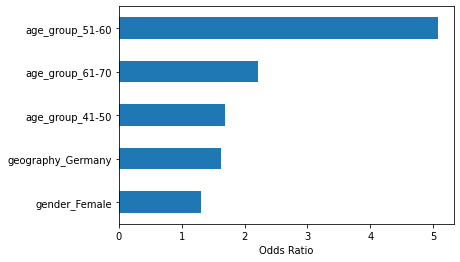

In [43]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind="barh")
plt.xlabel("Odds Ratio");

###### The chance of bank customers in the age group 51 - 60 to exit the bank increases by 5 times or 500% compared to other customers. While the odds os customers in age group 61 - 70 increases by 2.5 times 

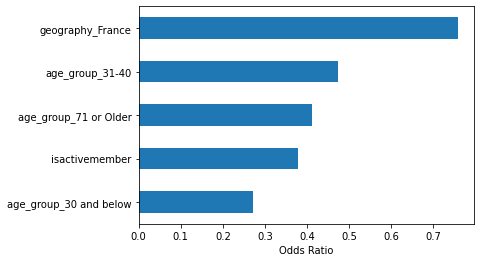

In [44]:
# Horizontal bar chart, five smallest coefficients
odds_ratios.head().plot(kind="barh")
plt.xlabel("Odds Ratio");

######Bank customers in the age group 30 and below are 73% less likely to exit the bank while customers that reside in france are 23% less likely to exit the bank.